**Exercise 1**
*   Create a new google collab notebook
*   Make a python script that can open and save images



**Panda**

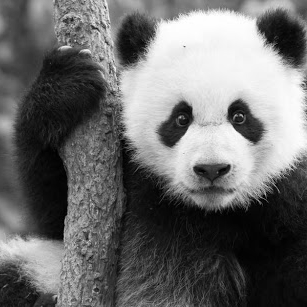

width =  307 height =  307 type:  uint8


In [ ]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow

panda = cv2.imread("panda.png")
cv2_imshow(panda)


print("width = ", panda.shape[0], "height = ", panda.shape[1], "type: ", panda.dtype)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

panda_s = cv2.imwrite("panda_s.png", panda)


**Bird**


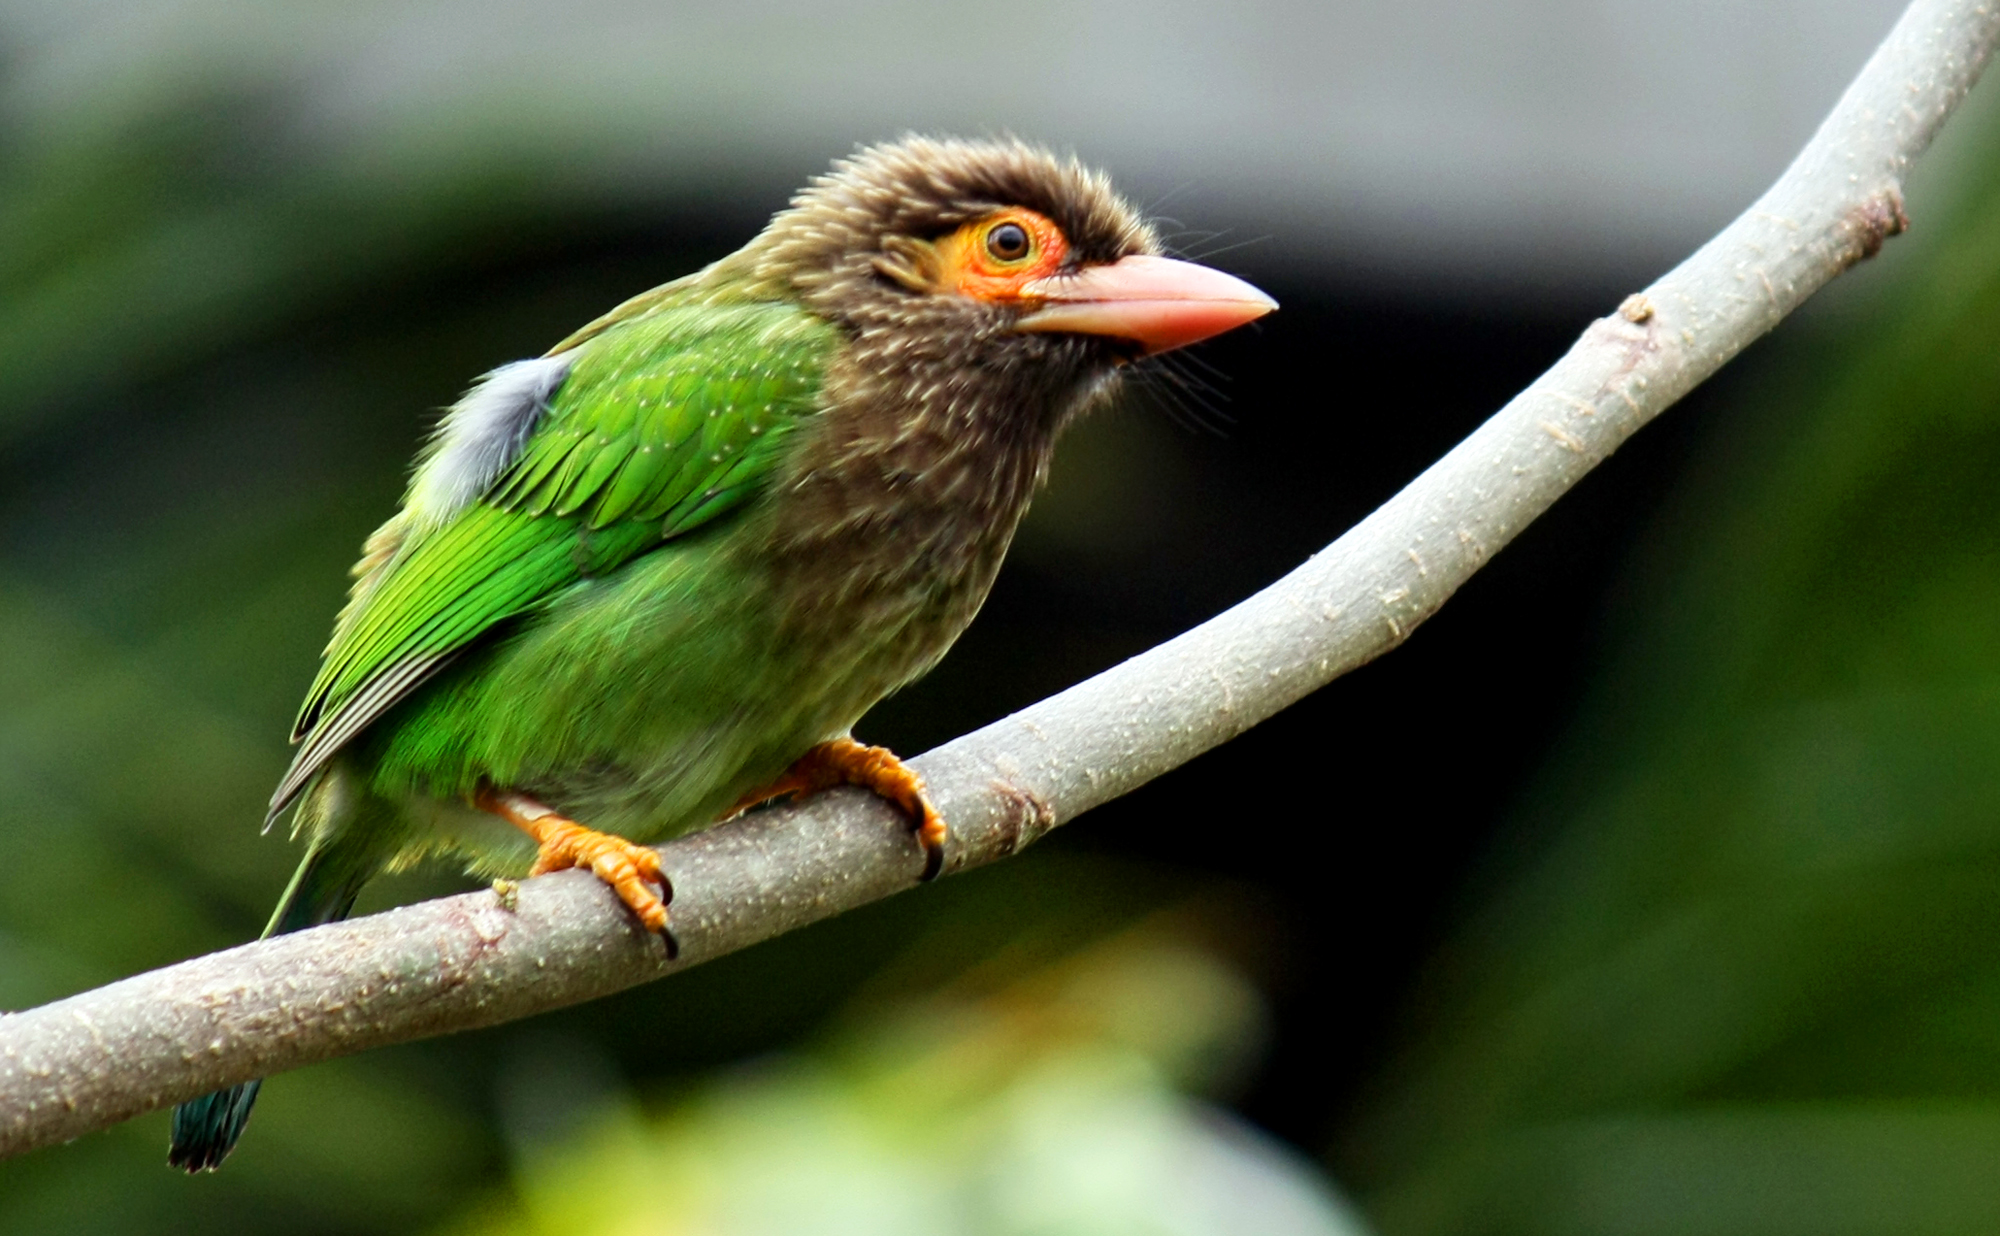

width =  1236 height =  2000 channels =  3 type:  uint8


In [ ]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow

bird  = cv2.imread("bird.png")
cv2_imshow(bird)
print("width = ", bird.shape[0], "height = ", bird.shape[1], "channels = ", bird.shape[2], "type: ", bird.dtype)
bird_s = cv2.imwrite("bird_s.png", bird)







**Exercise 2**

* With respective Matrix and Kernel, do the convolution operation.

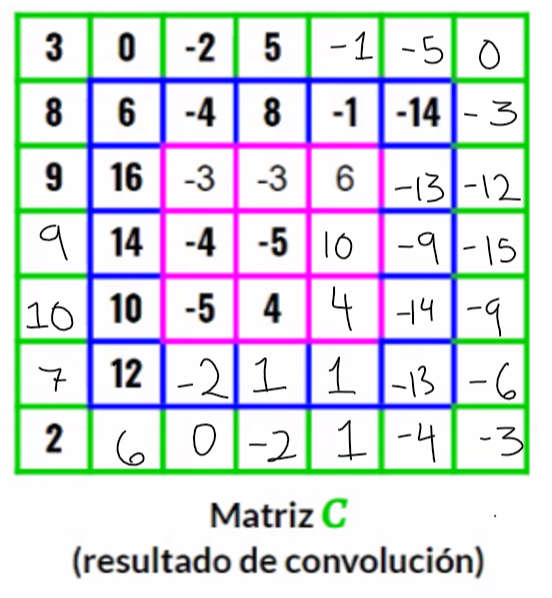


**Exercise 3** 
* Make a python script that can solve the previous problem and also that can solve any size matrix convolution

In [ ]:
import cv2
import numpy as np
from scipy import signal

#### Custom #######################
def convolution2d(A, K):
	K = np.flipud(np.fliplr(K))
	m, _ = K.shape
	y, x = A.shape
	MO = np.copy(A)  #Operation Matrix from A

	xo = x + (m-1)*2  #Operation matrix dimensions
	yo = y + (m-1)*2 

	for i in range(int((xo - x)/2)):		#Adding files and columns of zeros
			MO = np.insert(MO, 0, 0, axis=0)
			MO = np.insert(MO, MO.shape[0], 0, axis=0)
	for i in range(int((xo - x)/2)):
			MO = np.insert(MO, 0, 0, axis=1)
			MO = np.insert(MO, MO.shape[1], 0, axis=1)
	# print("Operation Matrix: ")
	# print(MO)

	y = y + m - 1 		#Convolution matrix dimensions
	x = x + m - 1


	C = np.zeros((y,x))		#convolution matrix with zeros
	for i in range(y):
		for j in range(x):

			#print(MO[i:i+m, j:j+m])

			C[i][j] = np.sum(MO[i:i+m, j:j+m]*K) 
			#print(C)
	return C

K = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
A = np.array([[3, 0, 1, 5, 0],
              [2, 6, 2, 4, 3],
              [2, 4, 1, 0, 6],
              [3, 0, 1, 5, 0],
              [2, 6, 2, 4, 3]])

print("Matrix: ")
print(A)
print("Kernel: ")
print(K)
print("Convolution: ")
print(convolution2d(A, K))


###### Scipy #######
print("------------Scipy---------------")
C = signal.convolve2d(A, K)
print(C)

Matrix: 
[[3 0 1 5 0]
 [2 6 2 4 3]
 [2 4 1 0 6]
 [3 0 1 5 0]
 [2 6 2 4 3]]
Kernel: 
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Convolution: 
[[  3.   0.  -2.   5.  -1.  -5.   0.]
 [  8.   6.  -4.   8.  -1. -14.  -3.]
 [  9.  16.  -3.  -3.   6. -13. -12.]
 [  9.  14.  -4.  -5.  10.  -9. -15.]
 [ 10.  10.  -5.   4.   4. -14.  -9.]
 [  7.  12.  -2.   1.   1. -13.  -6.]
 [  2.   6.   0.  -2.   1.  -4.  -3.]]
------------Scipy---------------
[[  3   0  -2   5  -1  -5   0]
 [  8   6  -4   8  -1 -14  -3]
 [  9  16  -3  -3   6 -13 -12]
 [  9  14  -4  -5  10  -9 -15]
 [ 10  10  -5   4   4 -14  -9]
 [  7  12  -2   1   1 -13  -6]
 [  2   6   0  -2   1  -4  -3]]


**Exercise 4**
* Apply the convolution operation with the nex images with the next filters
  * Averga filter
  * Sobel filter

Kernel sobel: 
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Kernel blur: 
[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]
Original: 


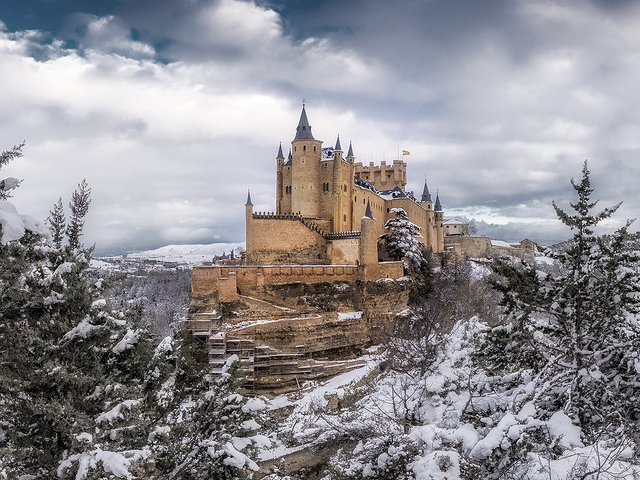

Blur: 


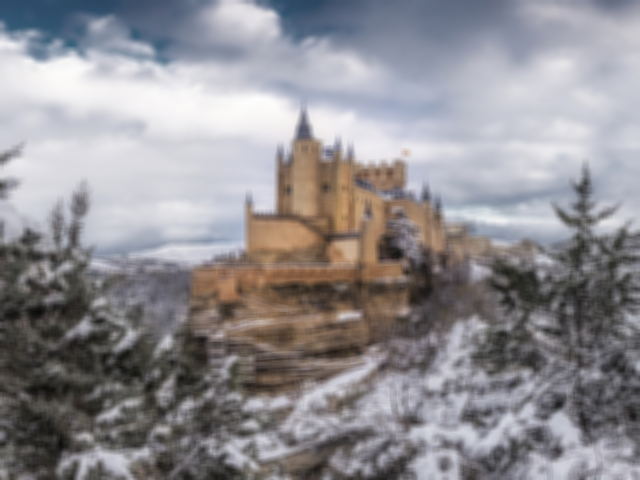

Sobel: 


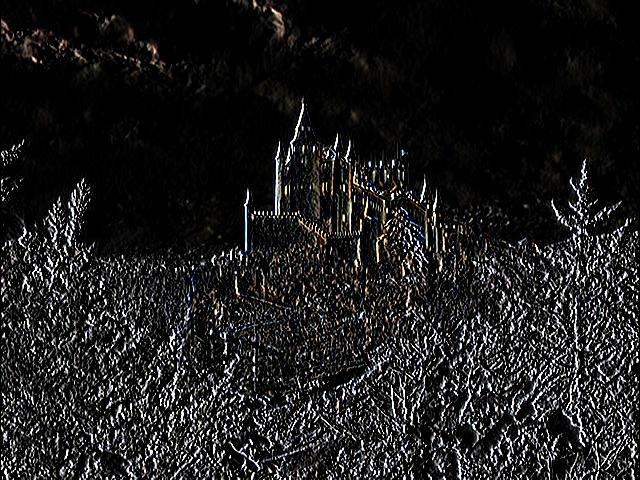

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img_src = cv2.imread('castle.png')

########## filter2D #######################################
#kernels
kernel_sobel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]) 
kernel_blur = np.ones((7,7),np.float32)/49
print("Kernel sobel: ")
print(kernel_sobel)
print("Kernel blur: ")
print(kernel_blur)

#filtro de imagen
img_sobel = cv2.filter2D(img_src,-1,kernel_sobel)
img_blur = cv2.filter2D(img_src,-1,kernel_blur)

#Guardar el resultado
cv2.imwrite('castle_sobel.png',img_sobel)
cv2.imwrite('castle_blur.png',img_blur)

print("Original: ")
cv2_imshow(img_src)
print("Blur: ")
cv2_imshow(img_blur)
print("Sobel: ")
cv2_imshow(img_sobel)


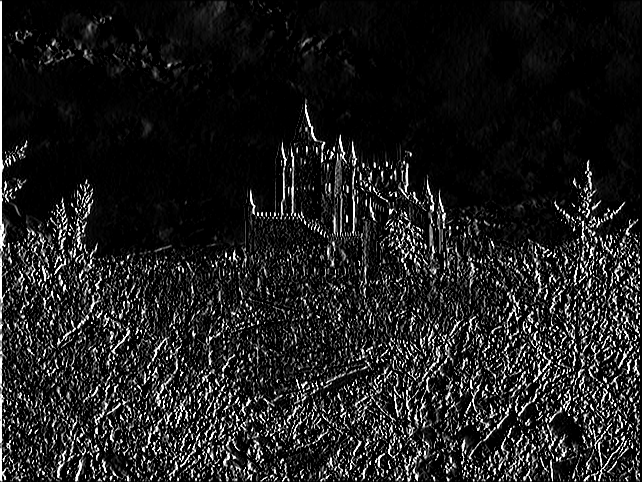

In [ ]:
import cv2
import numpy as np
from scipy import signal
from google.colab.patches import cv2_imshow

img_src = cv2.imread('castle.png')
img_src = cv2.cvtColor(img_src, cv2.COLOR_BGR2GRAY)

################## Convolution with scipy ############ 
kernel_sobel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]) 
img_sobel = signal.convolve2d(img_src, kernel_sobel)

cv2_imshow(img_sobel)
